In [2]:
import numpy as np
import tensorflow as tf
import edward as ed

from edward.models import Normal

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style('oceans16')

In [3]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

INFO:sklearn.datasets.twenty_newsgroups:Downloading 20news dataset. This may take a few minutes.
INFO:sklearn.datasets.twenty_newsgroups:Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)


In [24]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [53]:
# Term frequencies correct for document length
# Inverse document frequency weighs words less if they occur a lot (e.g. this, the etc)
class LCVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LCVectorizer, self).build_analyzer()
        return lambda doc: (lemmatizer.lemmatize(w) for w in analyzer(doc))
    
lcv = LCVectorizer(stop_words='english')


text_clf = Pipeline([('vect', lcv),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2')),    
])

In [54]:
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

C:\Users\ares\Anaconda3\envs\py35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [55]:
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
predicted =text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)

0.8503717472118959

In [56]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [35]:
np.unique(twenty_train.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [51]:
twenty_test.data[4]

'From: livesey@solntze.wpd.sgi.com (Jon Livesey)\nSubject: Re: After 2000 years, can we say that Christian Morality is\nOrganization: sgi\nLines: 22\nDistribution: world\nNNTP-Posting-Host: solntze.wpd.sgi.com\n\nIn article <1993Apr21.141259.12012@st-andrews.ac.uk>, nrp@st-andrews.ac.uk (Norman R. Paterson) writes:\n|> In article <1r2m21$8mo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n|> >In article <1993Apr19.151902.21216@st-andrews.ac.uk>, nrp@st-andrews.ac.uk (Norman R. Paterson) writes:\n> >Just as well, then, that I\'m not claiming that my own moral system is\n> >absolute.\n> >\n> >jon.\n> >\n> >[list of references stretching from here to Alpha Centauri deleted.]\n>\n> Jon-\n>\n> [and I thought to impress with my references!]\n>\n> Ok, so you don\'t claim to have an absolute moral system.  Do you claim\n> to have an objective one?  I\'ll assume your answer is "yes," apologies\n> if not.\n\nI\'ve just spent two solid months arguing that no such thing as an\

In [50]:
predicted[4], twenty_test.target_names[predicted[4]]

(0, 'alt.atheism')

In [57]:
from sklearn.metrics import confusion_matrix

In [65]:
cm = confusion_matrix(y_true=twenty_test.target, y_pred=predicted) / len(twenty_test.target)

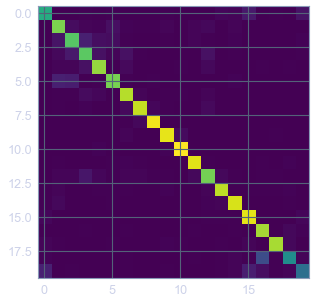

In [71]:
plt.figure(figsize=(14,5))
plt.imshow(cm)

In [62]:
%matplotlib inline

In [64]:
len(twenty_test.target)

7532